# Short look

Additional informations available at (what I've done and the further plans with this notebook):
https://raw.githubusercontent.com/szbela87/dm/main/hw1/readme.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#!pip install seaborn

In [3]:
np.random.seed(12)

In [4]:
df_train = pd.read_csv("https://raw.githubusercontent.com/szbela87/dm/main/hw1/train.csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.isnull().sum()["Fence"]

1179

In [7]:
len(df_train)

1460

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df_test = pd.read_csv("https://raw.githubusercontent.com/szbela87/dm/main/hw1/test.csv")

In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
#df_test["SalePrice"]

# Ok, we don't have the SalePrice in the test set. It's logical.

In [12]:
df_sub = pd.read_csv("https://raw.githubusercontent.com/szbela87/dm/main/hw1/sample_submission.csv")

In [13]:
df_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


# EDA

I'm using these concepts:

- (i) https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- (ii) https://www.kaggle.com/janvichokshi/random-forest-xgb-ridge-lasso-all-in-one

Short overview:

1. Data understanding and analysing
2. Outliers
3. Data transformation
4. Missing data for continuous variables and scaling
5. PCA
6. Dummy variables, missing data
7. Splitting the dataset into training and validation set

We'll use **Random Forests** and ...



## 1. Data understanding and analyzing

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.
The author of link (i) above found that the most important variables are:
* `OverallQual` - categorical
* `YearBuilt`
* `TotalBsmtSF`
* `GrLivArea`

He or she did the following thing very shortly. At first, created an Excel spreadsheet and tried to analyse each of the variables by hand asking him/herself that how important is that variable. He made some scatterplotts between these variables and `SalePrice`. Let's visualize the conclusions only.


In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
len(df_train.columns)
# 81 variables

81

**Descriptions**

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [16]:
import matplotlib.pyplot as plt

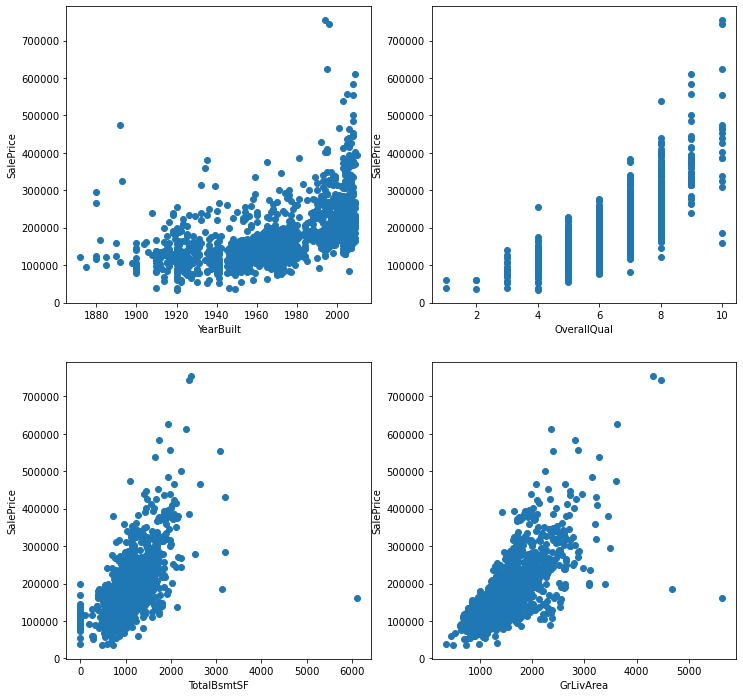

In [17]:
# Plotting

fig, axes = plt.subplots(2,2, figsize=(12,12))

axes[0,0].scatter(df_train["YearBuilt"],df_train["SalePrice"])
axes[0,0].set_xlabel("YearBuilt")
axes[0,0].set_ylabel("SalePrice")

axes[0,1].scatter(df_train["OverallQual"],df_train["SalePrice"])
axes[0,1].set_xlabel("OverallQual")
axes[0,1].set_ylabel("SalePrice")

axes[1,0].scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
axes[1,0].set_xlabel("TotalBsmtSF")
axes[1,0].set_ylabel("SalePrice")

axes[1,1].scatter(df_train["GrLivArea"],df_train["SalePrice"])
axes[1,1].set_xlabel("GrLivArea")
axes[1,1].set_ylabel("SalePrice")


plt.show()

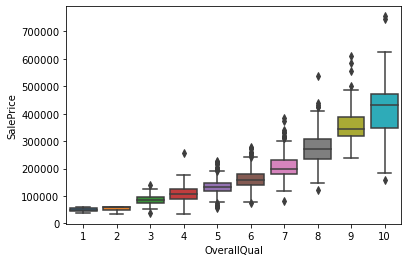

In [18]:
sns.boxplot(df_train["OverallQual"],df_train["SalePrice"])
plt.show()

In [19]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

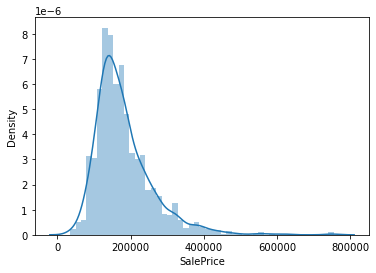

In [20]:
#histogram
sns.distplot(df_train['SalePrice']);

**Conclusion**

`SalePrice` and 
* `GrLivArea`: linear dependence
* `TotalBsmtSF`: linear?
* `OverallQual`: linear in that sense, that higher quality results us a higher price
* `YearBuilt`: older is cheaper, but not linearly?

Maybe I won't use later these conclusions. Let's have a deeper look inside.

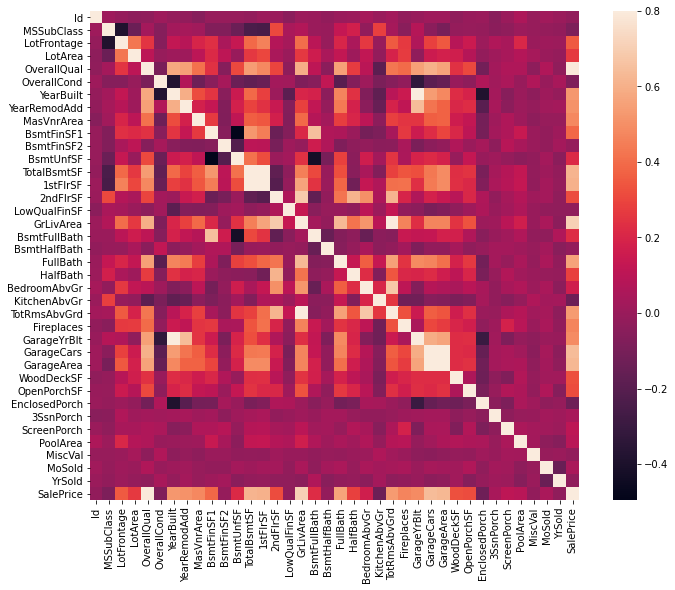

In [21]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

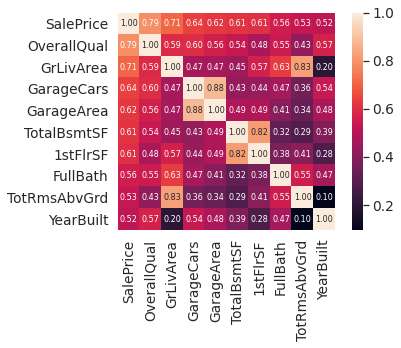

In [22]:
#saleprice correlation matrix - zoomed heatmap, 10 largets
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

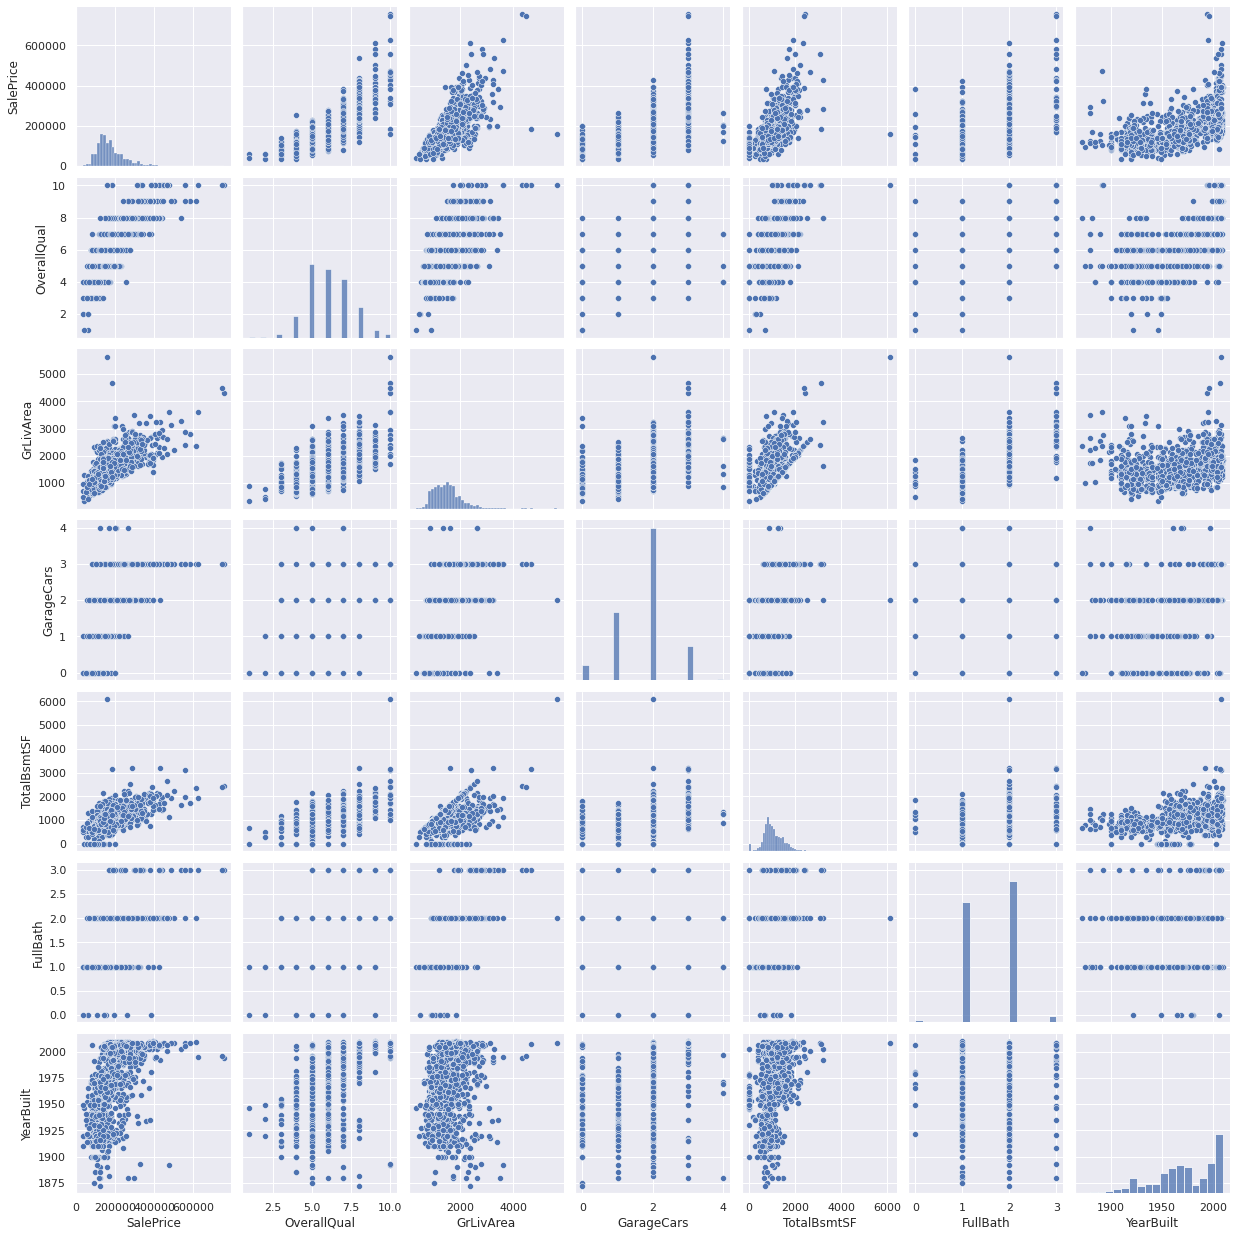

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

**Conclusion**

* `OverallQual`, `GrLivArea` and `TotalBsmtSF` are strongly correlated with `SalePrice`
* `GarageCars` and `GarageArea`, too. But these are obviously similar to each other.
* `TotalBsmtSF` and `1stFlrSF` are also similar to each other.
* `TotRmsAbvGrd` and `GrLivArea` are similar.

We will choose only one feature from each co-linear pair:

* `GarageCars` and `GarageArea` ---> `GarageArea`
* `TotalBsmtSF` and `1stFlrSF` ---> `TotalBsmtSF`
* `TotRmsAbvGrd` and `GrLivArea` ---> `GrLivArea`

In [24]:
df_train = df_train.drop("GarageCars",axis=1)
df_test = df_test.drop("GarageCars",axis=1)

In [25]:
df_train = df_train.drop("1stFlrSF",axis=1)
df_test = df_test.drop("1stFlrSF",axis=1)

In [26]:
df_train = df_train.drop("TotRmsAbvGrd",axis=1)
df_test = df_test.drop("TotRmsAbvGrd",axis=1)

We introduce the new variable `Bsmt` because of the description of the following variables:

* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area

In [27]:
df_train['Bsmt']=df_train['BsmtFinSF1']+df_train['BsmtFinSF2']+df_train['BsmtUnfSF']+df_train['TotalBsmtSF']
df_test['Bsmt']=df_test['BsmtFinSF1']+df_test['BsmtFinSF2']+df_test['BsmtUnfSF']+df_test['TotalBsmtSF']

## 2. Outliers

In [28]:
#standardizing data to apply 3-sigma, or any X-sigma rule
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


We'll remove outliers by hand by using the results of the link (ii), the outliers are:

* LotFrontage > 300 
* MasVnrArea > 1200
* Bsmt > 12000
* GrLivArea > 4000
* GarageArea > 1200
* SalePrice > 700000



In [29]:
df_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

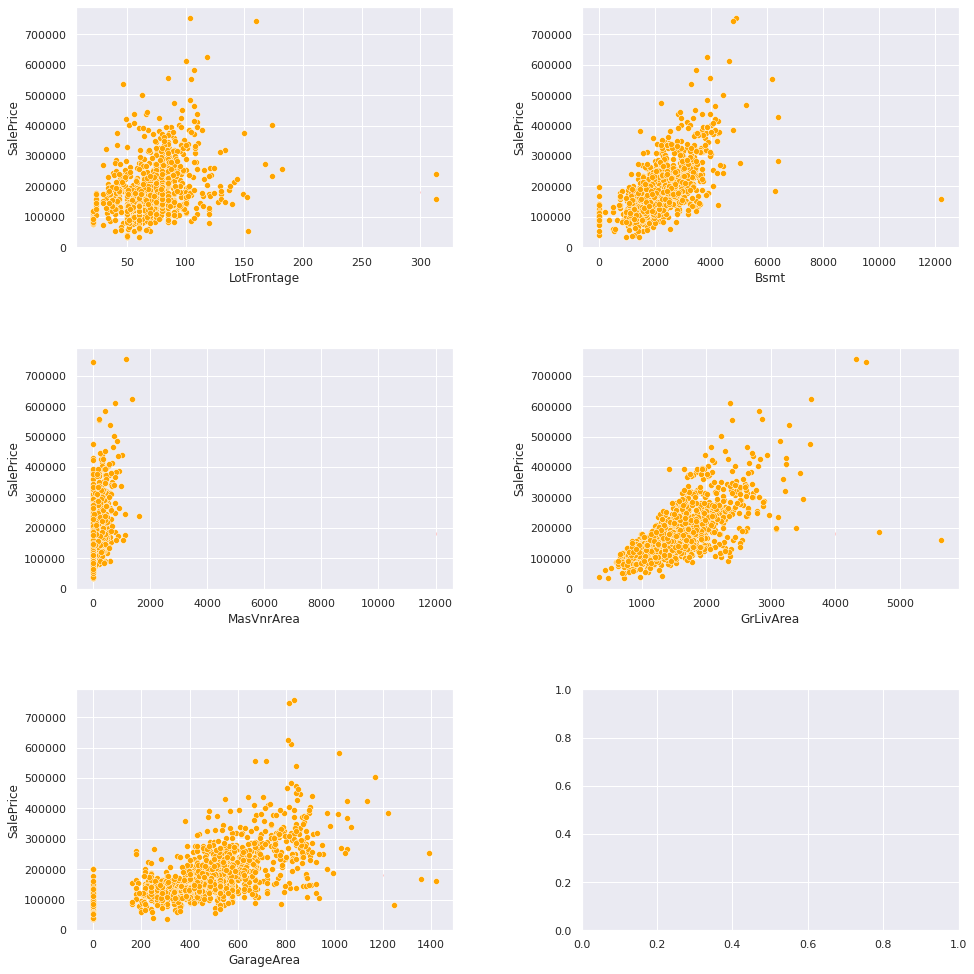

In [30]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
def graph(x,y,r,c,title,line):
    sns.scatterplot(df_train[x],df_train[y],color=('orange'),ax=ax[r][c])
    sns.lineplot(x=line,y=df_train[y],color='red',ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out=[300,1200,12000,4000,1200]
for r,col in enumerate(np.array(['LotFrontage','Bsmt','MasVnrArea','GrLivArea','GarageArea'])):
    c=r%2
    graph(col,'SalePrice',r//2,c,col,out[r])

In [31]:
a=df_train['LotFrontage'].sort_values(ascending=False).head(2)
b=df_train['MasVnrArea'].sort_values(ascending=False).head(2)
c=df_train['Bsmt'].sort_values(ascending=False).head(1)
d=df_train['GrLivArea'].sort_values(ascending=False).head(4)
e=df_train['GarageArea'].sort_values(ascending=False).head(5)
f=df_train['SalePrice'].sort_values(ascending=False).head(2)

In [32]:
#e=df_train['GarageArea'].sort_values(ascending=False)
#e.head(6)

In [33]:
print(f"a:\n{a}\n")
print(f"b:\n{b}\n")
print(f"c:\n{c}\n")
print(f"d:\n{d}\n")
print(f"e:\n{e}\n")
print(f"f:\n{f}\n")

a:
1298    313.0
934     313.0
Name: LotFrontage, dtype: float64

b:
297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64

c:
1298    12220
Name: Bsmt, dtype: int64

d:
1298    5642
523     4676
1182    4476
691     4316
Name: GrLivArea, dtype: int64

e:
1298    1418
581     1390
1190    1356
1061    1248
825     1220
Name: GarageArea, dtype: int64

f:
691     755000
1182    745000
Name: SalePrice, dtype: int64



In [34]:
index=a.index
index=index.append(b.index)
index=index.append(c.index)
index=index.append(d.index)
index=index.append(e.index)
index=index.append(f.index)

In [35]:
df_train = df_train.drop(index).reset_index(drop=True)

## 3. Data transformation for less skewness.

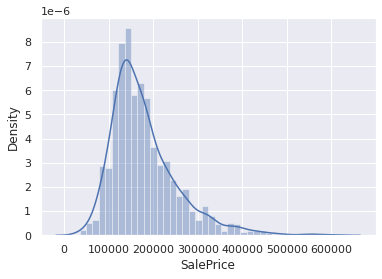

In [36]:
#histogram
sns.distplot(df_train['SalePrice']);

In [37]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.503221
Kurtosis: 3.465952


Ok, so `SalePrice` histogram tells us that it does not look like a normal distribution above, so we can't say that anything is outlier (based on the sigma-rule). 

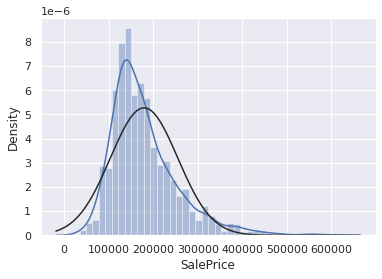

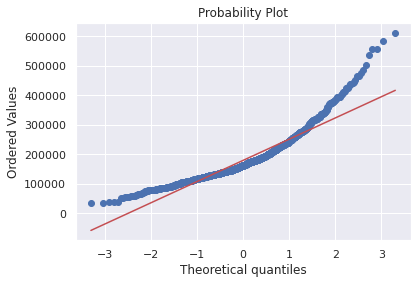

In [38]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In case of positive skewness, log transformations usually works well.

In [39]:
df_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1444    175000
1445    210000
1446    266500
1447    142125
1448    147500
Name: SalePrice, Length: 1449, dtype: int64

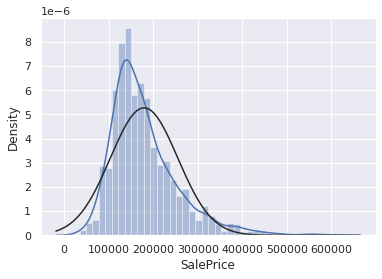

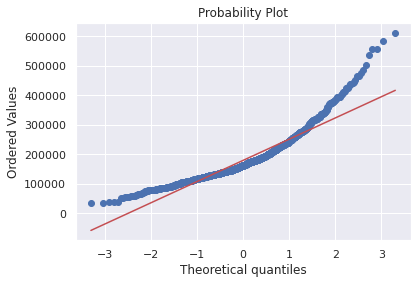

In [40]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

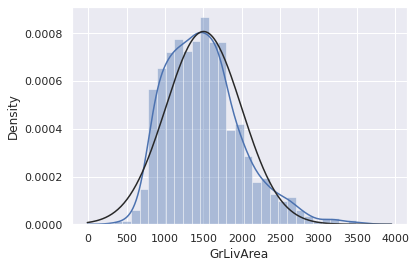

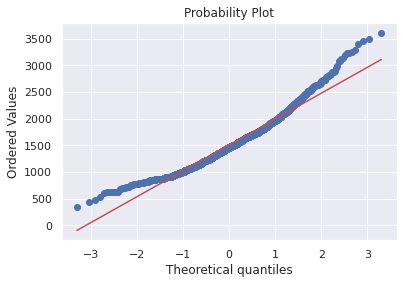

In [41]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [42]:
from scipy.stats import boxcox
bcx_target, lam_price = boxcox(df_train["SalePrice"])
#lam is the best lambda for the distribution

In [43]:
lam_price

-0.03360484772006266

In [44]:
# Maybe Box-Cox would be better for SalePrice??? I didn't want use it for the SalePrice. :)

In [45]:
def bc(x_vec,lmbda):
    """
    Box-Cox transformation
    """
    if (lmbda==0.0):
        return np.log(x_vec)
    else:
        return (x_vec**lmbda-1.0)/lmbda

In [46]:
#price_target = bc(df_train["SalePrice"].to_numpy(),lam_price) # Box Cox
price_target = np.log(df_train["SalePrice"])

In [47]:
price_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1444    12.072541
1445    12.254863
1446    12.493130
1447    11.864462
1448    11.901583
Name: SalePrice, Length: 1449, dtype: float64

In [48]:
df_train["SalePrice"] = price_target

In [49]:
def bc_inv(x_vec,lmbda):
    """
    Box-Cox transformation inverse
    """
    if (lmbda==0.0):
        return np.exp(x_vec)
    else:
        return (x_vec*lmbda+1.0)**(1.0/lmbda)

In [50]:
(bc_inv(price_target,lam_price) - df_train["SalePrice"].to_numpy()).min()

395725.5007125893

In [51]:
from scipy.stats import boxcox
bcx_target, lam = boxcox(df_train["GrLivArea"])
#lam is the best lambda for the distribution
lam

0.12539100931192076

We can apply here log transformation.

In [52]:
df_train['GrLivArea'] = bcx_target

In [53]:
df_train['GrLivArea']

0       12.307482
1       11.549386
2       12.418378
3       12.317875
4       12.956132
          ...    
1444    12.212238
1445    12.803023
1446    13.121086
1447    11.167362
1448    11.537722
Name: GrLivArea, Length: 1449, dtype: float64

In [54]:
df_test['GrLivArea'] = bc(df_test['GrLivArea'],lam)
df_test['GrLivArea']

0       10.728602
1       11.676440
2       12.184441
3       12.145384
4       11.584088
          ...    
1454    11.198359
1455    11.198359
1456    11.474679
1457    10.915641
1458    12.709830
Name: GrLivArea, Length: 1459, dtype: float64

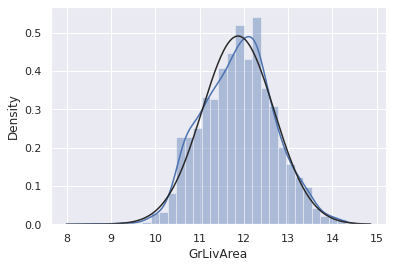

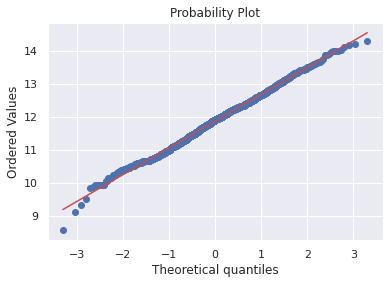

In [55]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

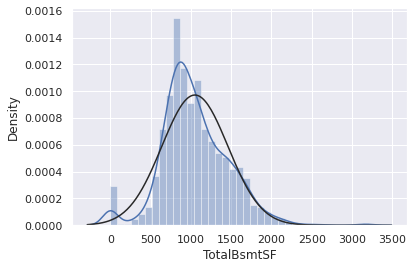

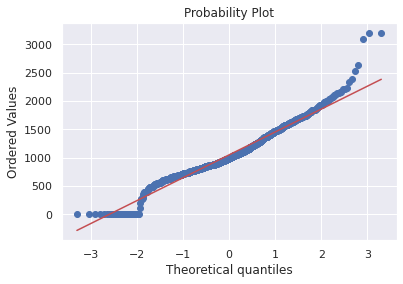

In [56]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [57]:
# yeojohnson - in TotalBsmtSF we have negative values as well
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(df_train["TotalBsmtSF"])

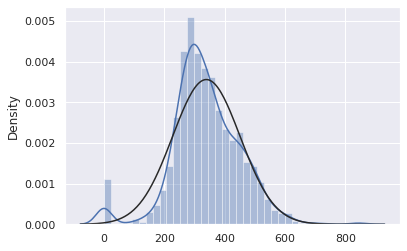

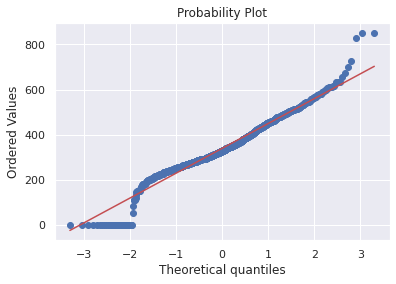

In [58]:
sns.distplot(yf_target, fit=norm);
fig = plt.figure()
res = stats.probplot(yf_target, plot=plt)

In [59]:
df_train["TotalBsmtSF"]

0        856
1       1262
2        920
3        756
4       1145
        ... 
1444     953
1445    1542
1446    1152
1447    1078
1448    1256
Name: TotalBsmtSF, Length: 1449, dtype: int64

In [60]:
def jy(x_vec,lmbda):
    """
    Yeo-Johnson by elementwise
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
    """
    y = np.zeros(len(x_vec))
    ind = 0
    for x in x_vec:
        if (x>=0) and (lmbda != 0): # for x >= 0, lmbda != 0
            y[ind] = ((x + 1)**lmbda - 1) / lmbda 
        if (x>=0) and (lmbda == 0):
            y[ind] = log(x + 1)
        if (x < 0) and (lmbda != 2):
            y[ind] = -((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda)
        if (x < 0) and (lmbda == 2):
            y[ind] = -log(-x + 1)
        ind += 1
    return y

In [61]:
# Testing
yf_target, jy(df_train["TotalBsmtSF"],lam)

(array([291.72064679, 399.81082091, 309.31541339, ..., 371.28200032,
        351.79928238, 398.26724661]),
 array([291.72064679, 399.81082091, 309.31541339, ..., 371.28200032,
        351.79928238, 398.26724661]))

In [62]:
df_train["TotalBsmtSF"] = yf_target

We don't apply for `GarageCars` and `GarageArea`. GarageArea depends on the number of the cars. Or in reverse.

In [63]:
df_test["TotalBsmtSF"] = jy(df_test["TotalBsmtSF"],lam)

## 4. Missing data for continuous variables

In [64]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1444,0.996549
MiscFeature,1396,0.963423
Alley,1359,0.937888
Fence,1169,0.806763
FireplaceQu,689,0.475500
LotFrontage,258,0.178054
GarageType,81,0.055901
GarageYrBlt,81,0.055901
GarageFinish,81,0.055901
GarageQual,81,0.055901


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. We'll delete the following variables:

* `PoolQc`
* `MiscFeature`
* `Alley`
* `Fence`
* `FireplaceQu`
* `LotFrontage`

Further remarks:

* `GarageYrBlt`, `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual` have the same amount of missing data.
* This holds for the `Bsmt*` variables too.
* And `MasVnr*`, too.
* `Electrical` has just 1 missing data.

We'll replace these data with the means of the corresponding columns.

In [65]:
# Dropping
df_train_dropped = df_train.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)
df_test_dropped = df_test.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)

In [66]:
missing_data[missing_data['Percent']>0.15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [67]:
len(df_train), len(df_train_dropped), len(df_train.columns), len(df_train_dropped.columns)

(1449, 1449, 79, 73)

In [68]:
len(df_test), len(df_test_dropped), len(df_test.columns), len(df_test_dropped.columns)

(1459, 1459, 78, 72)

In [69]:
#missing data in the test set
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461
GarageFinish,78,0.053461


In [70]:
df_train_filled = df_train_dropped.fillna(df_train_dropped.mean())
df_test_filled = df_test_dropped.fillna(df_train_dropped.drop("SalePrice",axis=1).mean()) # Filling with the means of the training set

In [71]:
len(df_train_dropped.drop("SalePrice",axis=1).columns)

72

In [72]:
df_train_filled.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Bsmt             0
Length: 73, dtype: int64

In [73]:
df_train_filled.isnull().sum().max()

81

In [74]:
df_test_filled.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Bsmt             0
Length: 72, dtype: int64

In [75]:
df_test_filled.isnull().sum().max()

78

In [76]:
df_train_filled["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1444    1456
1445    1457
1446    1458
1447    1459
1448    1460
Name: Id, Length: 1449, dtype: int64

**Conclusion**

There are also categorical missing values!

In [77]:
# which are the categorical features?
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1191 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1449 non-null   object 
 8   LandContour    1449 non-null   object 
 9   Utilities      1449 non-null   object 
 10  LotConfig      1449 non-null   object 
 11  LandSlope      1449 non-null   object 
 12  Neighborhood   1449 non-null   object 
 13  Condition1     1449 non-null   object 
 14  Condition2     1449 non-null   object 
 15  BldgType       1449 non-null   object 
 16  HouseStyle     1449 non-null   object 
 17  OverallQual    1449 non-null   int64  
 18  OverallC

In [78]:
non_numerical = []
for col in df_train_filled.columns:
    if (df_train_filled[col].dtype == "object"):
        non_numerical.append(col)
        
non_numerical.append("SalePrice") # We don't want to scale these
non_numerical.append("Id") # We don't want to scale this, too

In [79]:
# checking that we scaling only the proper variables !!!!!!!!!!!!!!!!!!!!

In [80]:
# continuous features
numerical=np.array([col for col in df_train_filled.columns if col not in non_numerical])

In [81]:
numerical

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Bsmt'], dtype='<U13')

In [82]:
df_train_filled["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1444    12.072541
1445    12.254863
1446    12.493130
1447    11.864462
1448    11.901583
Name: SalePrice, Length: 1449, dtype: float64

In [83]:
df_train_filled["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1444    1456
1445    1457
1446    1458
1447    1459
1448    1460
Name: Id, Length: 1449, dtype: int64

## 5. PCA

In [84]:
cols = df_train_filled.columns

In [85]:
numerical_cols = []
for col in cols:
    if (df_train_filled[col].dtype!='object'):
        numerical_cols.append(col)
        
numerical_cols.remove("Id")
numerical_cols.remove("SalePrice")
numerical_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Bsmt']

In [86]:
len(numerical_cols)

33

In [87]:
pca_test = df_train_filled[numerical_cols].to_numpy()

In [88]:
pca_test.shape

(1449, 33)

In [89]:
means = np.mean(pca_test,axis=0)
sigmas = np.std(pca_test,axis=0)

In [90]:
np.min(sigmas)

0.22105967529222262

In [91]:
pca_test = (pca_test - means)/sigmas

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(n_components=pca_test.shape[1])

In [94]:
pca.fit(pca_test)

PCA(n_components=33)

In [95]:
print(pca.singular_values_)

[9.30430235e+01 6.63805407e+01 5.63472877e+01 5.43283947e+01
 4.55742995e+01 4.14806638e+01 4.08403866e+01 4.06510129e+01
 3.97346089e+01 3.94655716e+01 3.83879053e+01 3.81845227e+01
 3.78267810e+01 3.68646779e+01 3.58793499e+01 3.54656816e+01
 3.45526270e+01 3.36993622e+01 3.34953428e+01 3.17156205e+01
 3.02922003e+01 3.00382377e+01 2.84789683e+01 2.59029183e+01
 2.30086752e+01 2.11816998e+01 1.96328699e+01 1.88936934e+01
 1.72367292e+01 1.38475369e+01 1.15021231e+01 2.22126863e+00
 2.19989677e-14]


In [96]:
sum_ = np.sum(pca.singular_values_)

In [97]:
sum_temp = 0.0
for i in range(pca_test.shape[1]):
    sum_temp += pca.singular_values_[i]
    print(f"{i+1} | {sum_temp/sum_*100:.4f}")

1 | 8.3360
2 | 14.2833
3 | 19.3316
4 | 24.1991
5 | 28.2822
6 | 31.9986
7 | 35.6577
8 | 39.2997
9 | 42.8597
10 | 46.3955
11 | 49.8348
12 | 53.2559
13 | 56.6449
14 | 59.9478
15 | 63.1623
16 | 66.3398
17 | 69.4355
18 | 72.4547
19 | 75.4557
20 | 78.2972
21 | 81.0112
22 | 83.7024
23 | 86.2539
24 | 88.5746
25 | 90.6361
26 | 92.5338
27 | 94.2928
28 | 95.9855
29 | 97.5298
30 | 98.7705
31 | 99.8010
32 | 100.0000
33 | 100.0000


**Conclusion**

Unfortunately, we need most of the dimensions for at least 99% of the variance.

In [98]:
# Dummy testing
a = pd.Series(np.array([2.2,3.3,4.4]))
b = pd.Series(['a','b','a'])

In [99]:
c = pd.DataFrame({'s':a,'v':b})

In [100]:
c

,s,v
0,2.2,a
1,3.3,b
2,4.4,a


In [101]:
pd.get_dummies(c)

,s,v_a,v_b
0,2.2,1,0
1,3.3,0,1
2,4.4,1,0


## 6. Dummy variables and missing data

### Merge the training and testing data

In [102]:
df_train_filled.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1712
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,2524


In [103]:
df_test_filled.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bsmt
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,1764.0
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0


In [104]:
df_train_prices = df_train_filled["SalePrice"]
df_train_filled = df_train_filled.drop("SalePrice",axis=1)
#df_train_filled = df_train_filled.set_index("Id")
#df_test_filled = df_test_filled.set_index("Id")

In [105]:
df_train_prices

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1444    12.072541
1445    12.254863
1446    12.493130
1447    11.864462
1448    11.901583
Name: SalePrice, Length: 1449, dtype: float64

In [106]:
df_all = pd.concat([df_train_filled,df_test_filled],axis=0)

In [107]:
df_all

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,1712.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,2524.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1840.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,1512.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,2290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,1092.0
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,1092.0
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,2448.0
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,1824.0


In [108]:
df_all.dropna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,1712.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,2524.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1840.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,1512.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,2290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,5,2006,WD,Normal,2208.0
1452,2913,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2006,WD,Abnorml,1092.0
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,1092.0
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,2448.0


In [109]:
df_all["LotShape"].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [110]:
non_numerical.remove("SalePrice")

In [111]:
non_numerical.remove("Id")

### Unique values

In [112]:
unique_values_numerical = {}
for col in numerical:
    temp_list = list(df_all.dropna()[col].unique())
    unique_values_numerical[col] = temp_list
    
for key, value in unique_values_numerical.items():
    if (len(value)<=10):
        print(f"{key}: {value}")

print("\n")
for key, value in unique_values_numerical.items():
    if (len(value)<=5):
        print(f"{key}: {value}")

OverallQual: [7, 6, 8, 5, 9, 4, 10, 3, 2]
OverallCond: [5, 8, 6, 7, 4, 3, 9, 2, 1]
BsmtFullBath: [1.0, 0.0, 2.0]
BsmtHalfBath: [0.0, 1.0, 2.0]
FullBath: [2, 1, 3, 0, 4]
HalfBath: [1, 0, 2]
BedroomAbvGr: [3, 4, 1, 2, 0, 5, 6]
KitchenAbvGr: [1, 2, 3, 0]
Fireplaces: [0, 1, 2, 3, 4]
YrSold: [2008, 2007, 2006, 2009, 2010]


BsmtFullBath: [1.0, 0.0, 2.0]
BsmtHalfBath: [0.0, 1.0, 2.0]
FullBath: [2, 1, 3, 0, 4]
HalfBath: [1, 0, 2]
KitchenAbvGr: [1, 2, 3, 0]
Fireplaces: [0, 1, 2, 3, 4]
YrSold: [2008, 2007, 2006, 2009, 2010]


**Conclusion** 
I think, we should keep these variables as numerical values.

In [113]:
unique_values = {}
for col in non_numerical:
    temp_list = list(df_all.dropna()[col].unique())
    unique_values[col] = temp_list

unique_values

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
 'Street': ['Pave', 'Grvl'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'Edwards',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 'Condition1': ['Norm',
  'Feedr',
  'PosN',
  'Artery',
  'RRAe',
  'RRNn',
  'RRAn',
  'PosA',
  'RRNe'],
 'Condition2': ['Norm',
  'Artery',
  'RRNn',
  'Feedr',
  'PosA',
  'RRAn',
  'RRAe',
  'PosN'],
 'BldgType': ['1Fam', '2fmCon', 'TwnhsE', 'Duplex', 'Twnhs'],
 'HouseStyle': ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  'SFoyer',
  'SLvl',
  '2.5Unf',
 

In [114]:
type(unique_values["SaleCondition"][1])

str

In [115]:
"Abnorml" in unique_values["SaleCondition"]

True

In [116]:
import time

In [117]:
df_all

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,1712.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,2524.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1840.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,1512.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,2290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,1092.0
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,1092.0
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,2448.0
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,1824.0


In [118]:
df_train["SaleCondition"].iloc[:100].value_counts()

Normal     82
Abnorml    10
Partial     7
AdjLand     1
Name: SaleCondition, dtype: int64

In [119]:
df_all.iloc[:]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Bsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,1712.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,2524.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1840.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,1512.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,2290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,1092.0
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,1092.0
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,2448.0
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,1824.0


### Get dummies

In [120]:
# get dummies by elements
start_time = time.time()
df_all_converted = pd.DataFrame()
for ind in range(len(df_all)):
    if (ind%100==0):
        print(f"{ind+1}/{len(df_all)} | ET: {time.time() - start_time:.2f}s")
    item = df_all.iloc[ind]
    item = item.dropna()
    item = pd.DataFrame(item).T
    columns = item.columns
    #print(item)
    
    # iterate over the categorical columns
    for col in non_numerical:
        if col in columns:
            col_value = list(item[col])[0]
            for cat in unique_values[col]:
                col_cat = col + "_" + cat
                item[col_cat] = 0.0
            
                #print(list(item[col])[0])
                if (col + "_" + col_value == col_cat):
                    col_cat = col + "_" + cat
                    item[col_cat] = 1.0
            item.drop(col,axis=1,inplace=True)
    df_all_converted = df_all_converted.append(item,ignore_index=True)


1/2908 | ET: 0.00s
101/2908 | ET: 17.53s
201/2908 | ET: 35.22s
301/2908 | ET: 53.00s
401/2908 | ET: 70.74s
501/2908 | ET: 88.68s
601/2908 | ET: 106.35s
701/2908 | ET: 123.79s
801/2908 | ET: 141.19s
901/2908 | ET: 158.65s
1001/2908 | ET: 176.15s
1101/2908 | ET: 193.77s
1201/2908 | ET: 211.63s
1301/2908 | ET: 229.09s
1401/2908 | ET: 246.87s
1501/2908 | ET: 264.81s
1601/2908 | ET: 282.35s
1701/2908 | ET: 300.30s
1801/2908 | ET: 318.25s
1901/2908 | ET: 335.92s
2001/2908 | ET: 353.82s
2101/2908 | ET: 371.79s
2201/2908 | ET: 389.66s
2301/2908 | ET: 407.57s
2401/2908 | ET: 425.63s
2501/2908 | ET: 443.32s
2601/2908 | ET: 461.18s
2701/2908 | ET: 479.17s
2801/2908 | ET: 497.21s
2901/2908 | ET: 515.10s


In [121]:
df_all_converted["SaleCondition_Abnorml"].sum()

189.0

In [122]:
df_all_converted["SaleCondition_Abnorml"].iloc[3]

1.0

In [123]:
"SaleCondition" in non_numerical

True

In [124]:
len(df_train_filled) + len(df_test_filled)

2908

In [125]:
len(df_train_filled), len(df_test_filled)

(1449, 1459)

In [126]:
df_all_converted["SaleCondition_Abnorml"].max()

1.0

### Cut them into back to train and test set

In [127]:

df_test_cat = df_all_converted[df_all_converted["Id"]>=1461]
df_train_cat = df_all_converted[df_all_converted["Id"]<1461]

In [128]:
len(df_test_cat), len(df_train_cat)

(1459, 1449)

In [129]:
df_train_cat.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df_train_cat.isnull().sum().max()

81

In [131]:
df_test_cat.isnull().sum().max()

78

In [132]:
df_train_cat.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Filling with the means

With this, we get probabilities for missing classes (it's a priori, this is from that distribution which we have in the training set)


In [133]:
df_train_cat.mean()

Id                         729.308489
MSSubClass                  56.887509
LotArea                  10396.584541
OverallQual                  6.084196
OverallCond                  5.579020
                             ...     
SaleCondition_Abnorml        0.069013
SaleCondition_Partial        0.083506
SaleCondition_Family         0.013803
SaleCondition_Alloca         0.008282
SaleCondition_AdjLand        0.002761
Length: 263, dtype: float64

In [134]:
df_train_cat["SaleCondition_Abnorml"].max()

1.0

In [135]:
df_train_cat_filled = df_train_cat.fillna(df_train_cat.mean())

In [136]:
df_test_cat_filled = df_test_cat.fillna(df_train_cat.mean())

In [137]:
df_train_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1456,60,7917,6,5,1999,2000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1445,1457,20,13175,6,6,1978,1988,119.0,790.0,163.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1446,1458,70,9042,7,9,1941,2006,0.0,275.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1447,1459,20,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df_test_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
1449,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1450,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1451,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1452,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1453,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2904,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2905,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2906,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### + Push bach the SalePrice

We removed it when we did in the 1st step:
> df_train_prices

Using this: https://www.statology.org/pandas-merge-on-index/

In [139]:
df_train_prices

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1444    12.072541
1445    12.254863
1446    12.493130
1447    11.864462
1448    11.901583
Name: SalePrice, Length: 1449, dtype: float64

In [140]:
df_train_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1456,60,7917,6,5,1999,2000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1445,1457,20,13175,6,6,1978,1988,119.0,790.0,163.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1446,1458,70,9042,7,9,1941,2006,0.0,275.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1447,1459,20,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [141]:
df_test_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
1449,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1450,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1451,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1452,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1453,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2904,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2905,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2906,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [142]:
df_train_cat_filled = df_train_cat_filled.join(df_train_prices)

In [143]:
df_train_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.247694
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.109011
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.317167
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.849398
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1456,60,7917,6,5,1999,2000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.072541
1445,1457,20,13175,6,6,1978,1988,119.0,790.0,163.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.254863
1446,1458,70,9042,7,9,1941,2006,0.0,275.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.493130
1447,1459,20,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.864462


In [144]:
df_test_cat_filled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
1449,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1450,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1451,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1452,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1453,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2904,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2905,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2906,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [145]:
df_train_cat_filled = df_train_cat_filled.set_index("Id")
df_test_cat_filled = df_test_cat_filled.set_index("Id")


**Important** 

Don't forget, that the target was log transformated!!!

## 7. Splitting the training set into a training and validation set

In [146]:
non_numerical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [147]:
numerical

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Bsmt'], dtype='<U13')

In [148]:
df_train_cat_filled[numerical].std().min(), df_train_cat_filled[numerical].std().argmin()

(0.22113599487857633, 19)

### Scaling

In [149]:
mins = df_train_cat_filled.min()
maxs = df_train_cat_filled.max()
df_train_cat_filled[numerical] = (df_train_cat_filled[numerical] - mins[numerical])/(maxs[numerical]-mins[numerical])
df_test_cat_filled[numerical] = (df_test_cat_filled[numerical] - mins[numerical])/(maxs[numerical]-mins[numerical])

In [150]:
df_train_cat_filled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.173605,0.322669,0.000000,0.064212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.247694
2,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.109011
3,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.143490,0.222121,0.000000,0.185788,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.317167
4,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.849398
5,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.310009,0.299360,0.000000,0.209760,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.072541
1457,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.105403,0.361060,0.110583,0.252140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.254863
1458,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.493130


In [151]:
df_test_cat_filled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.000000,0.048246,0.444444,0.625,0.644928,0.183333,0.000000,0.213894,0.097693,0.115582,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1462,0.000000,0.060609,0.555556,0.625,0.623188,0.133333,0.095660,0.421846,0.000000,0.173801,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1463,0.235294,0.058566,0.444444,0.500,0.905797,0.800000,0.000000,0.361517,0.000000,0.058647,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1464,0.235294,0.040562,0.555556,0.625,0.913043,0.800000,0.017715,0.275137,0.000000,0.138699,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1465,0.588235,0.017318,0.777778,0.500,0.869565,0.700000,0.000000,0.120201,0.000000,0.435360,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.823529,0.002973,0.333333,0.750,0.710145,0.333333,0.000000,0.000000,0.000000,0.233733,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.823529,0.002776,0.333333,0.500,0.710145,0.333333,0.000000,0.115174,0.000000,0.125856,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,0.000000,0.087406,0.444444,0.750,0.637681,0.766667,0.000000,0.559415,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Removing small std columns

In [152]:
df_train_cat_filled.std()

MSSubClass               0.248688
LotArea                  0.045953
OverallQual              0.151154
OverallCond              0.139259
YearBuilt                0.218933
                           ...   
SaleCondition_Partial    0.276741
SaleCondition_Family     0.116711
SaleCondition_Alloca     0.090657
SaleCondition_AdjLand    0.052486
SalePrice                0.394044
Length: 263, dtype: float64

In [153]:
df_train_cat_filled.max()

MSSubClass                1.000000
LotArea                   1.000000
OverallQual               1.000000
OverallCond               1.000000
YearBuilt                 1.000000
                           ...    
SaleCondition_Partial     1.000000
SaleCondition_Family      1.000000
SaleCondition_Alloca      1.000000
SaleCondition_AdjLand     1.000000
SalePrice                13.323927
Length: 263, dtype: float64

In [154]:
df_train_cat_filled["SaleCondition_Abnorml"].max()

1.0

In [155]:
# Create a dictionary with the stds
cols_with_std = {}
for col in df_train_cat_filled.columns:
    cols_with_std[col] = df_train_cat_filled[col].std()

In [156]:
len(cols_with_std)

263

In [157]:
cols_below_threshold = []
THRESHOLD = 0.01
for key, item in cols_with_std.items():
    if item<THRESHOLD:
        cols_below_threshold.append(key)
        
print(len(cols_below_threshold))

1


In [158]:
#df_train_cat_filled[cols_below_threshold]

In [159]:
df_train_cat_filled = df_train_cat_filled.drop(cols_below_threshold,axis=1)

In [160]:
df_test_cat_filled = df_test_cat_filled.drop(cols_below_threshold,axis=1)

In [161]:
df_train_cat_filled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.173605,0.322669,0.000000,0.064212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.247694
2,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.109011
3,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.143490,0.222121,0.000000,0.185788,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.317167
4,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.849398
5,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.310009,0.299360,0.000000,0.209760,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.072541
1457,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.105403,0.361060,0.110583,0.252140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.254863
1458,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.493130


In [162]:
df_train_cat_filled.std().min()

0.026270340609958823

In [163]:
df_train_cat_filled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.173605,0.322669,0.000000,0.064212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.247694
2,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.109011
3,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.143490,0.222121,0.000000,0.185788,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.317167
4,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.849398
5,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.310009,0.299360,0.000000,0.209760,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.072541
1457,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.105403,0.361060,0.110583,0.252140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.254863
1458,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.493130


In [164]:
df_test_cat_filled

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.000000,0.048246,0.444444,0.625,0.644928,0.183333,0.000000,0.213894,0.097693,0.115582,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1462,0.000000,0.060609,0.555556,0.625,0.623188,0.133333,0.095660,0.421846,0.000000,0.173801,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1463,0.235294,0.058566,0.444444,0.500,0.905797,0.800000,0.000000,0.361517,0.000000,0.058647,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1464,0.235294,0.040562,0.555556,0.625,0.913043,0.800000,0.017715,0.275137,0.000000,0.138699,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1465,0.588235,0.017318,0.777778,0.500,0.869565,0.700000,0.000000,0.120201,0.000000,0.435360,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.823529,0.002973,0.333333,0.750,0.710145,0.333333,0.000000,0.000000,0.000000,0.233733,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.823529,0.002776,0.333333,0.500,0.710145,0.333333,0.000000,0.115174,0.000000,0.125856,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,0.000000,0.087406,0.444444,0.750,0.637681,0.766667,0.000000,0.559415,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Splitting

In [165]:
y_train = df_train_cat_filled["SalePrice"]
x_train = df_train_cat_filled.drop("SalePrice",axis=1)

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train,test_size = .3, random_state=12)

In [167]:
Y_train

Id
1109    12.106252
1460    11.901583
385     12.388394
657     11.887931
1034    12.345835
          ...    
434     12.106252
1294    12.000892
1276    11.827736
1288    12.154779
1426    11.863582
Name: SalePrice, Length: 1014, dtype: float64

In [168]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
Id,,,,,,,,,,,,,,,,,,,,,
1109,0.235294,0.031611,0.555556,0.500,0.927536,0.833333,0.000000,0.000000,0.000000,0.395548,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1460,0.000000,0.040370,0.444444,0.625,0.673913,0.250000,0.000000,0.379342,0.196744,0.058219,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
385,0.235294,0.242151,0.555556,0.500,0.869565,0.700000,0.000000,0.450183,0.000000,0.254709,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
657,0.000000,0.040697,0.444444,0.750,0.630435,0.933333,0.047830,0.368373,0.000000,0.105736,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1034,0.000000,0.031901,0.666667,0.500,0.942029,0.866667,0.261293,0.450640,0.000000,0.285959,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.235294,0.044586,0.555556,0.500,0.905797,0.800000,0.000000,0.000000,0.000000,0.396404,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1294,0.235294,0.041319,0.666667,0.500,0.753623,0.433333,0.000000,0.088665,0.000000,0.273116,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1276,0.411765,0.046951,0.444444,0.500,0.550725,0.000000,0.502214,0.100548,0.000000,0.303082,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [169]:
len(X_train), len(X_valid), X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

(1014, 435, (1014, 261), (1014,), (435, 261), (435,))

In [170]:
Y_train

Id
1109    12.106252
1460    11.901583
385     12.388394
657     11.887931
1034    12.345835
          ...    
434     12.106252
1294    12.000892
1276    11.827736
1288    12.154779
1426    11.863582
Name: SalePrice, Length: 1014, dtype: float64

In [171]:
train_set = X_train.join(Y_train)
valid_set = X_valid.join(Y_valid)
all_train_set = pd.concat([train_set,valid_set],axis=0)
all_train_set

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1109,0.235294,0.031611,0.555556,0.500,0.927536,0.833333,0.000000,0.000000,0.000000,0.395548,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.106252
1460,0.000000,0.040370,0.444444,0.625,0.673913,0.250000,0.000000,0.379342,0.196744,0.058219,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.901583
385,0.235294,0.242151,0.555556,0.500,0.869565,0.700000,0.000000,0.450183,0.000000,0.254709,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.388394
657,0.000000,0.040697,0.444444,0.750,0.630435,0.933333,0.047830,0.368373,0.000000,0.105736,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.887931
1034,0.000000,0.031901,0.666667,0.500,0.942029,0.866667,0.261293,0.450640,0.000000,0.285959,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.345835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.000000,0.035416,0.333333,0.500,0.572464,0.016667,0.000000,0.382084,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.532728
703,0.235294,0.052060,0.777778,0.500,0.971014,0.933333,0.412755,0.000000,0.000000,0.528253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.799176
213,0.235294,0.034308,0.666667,0.500,0.992754,0.983333,0.000000,0.375686,0.000000,0.033390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.439871


### Saving

In [172]:
all_train_set.to_csv("train_clean.csv",sep=" ",index=False,header=None)
df_test_cat_filled.to_csv("test_clean.csv",sep=" ",index=False,header=None)

# Choosing the models for the 1st competition

by using only decision trees (including ensemble learning techniques, like random forest, but not boosting techniques)

1. Ridge - for baseline only
2. Random Forest Regressor


In [173]:
len(X_train), len(X_valid), X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

(1014, 435, (1014, 261), (1014,), (435, 261), (435,))

## 1. Ridge regression (for baseline)

In [174]:
np.linspace(0,2,21)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [175]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in np.linspace(0,5,1001)]}

model_ridge=GridSearchCV(ridge, param_grid=parameters,refit=True)
model_ridge.fit(X_train,Y_train)
print("The best value of Alpha is: ",model_ridge.best_params_)

The best value of Alpha is:  {'alpha': 2.215}


In [176]:
# Check
model_ridge=Ridge(alpha=2.215)
model_ridge.fit(X_train,Y_train)

y_train_pred_ridge=model_ridge.predict(X_train)
y_val_pred_ridge=model_ridge.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_ridge))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_ridge)))) 

Root Mean Square Error train = 0.09238602081650073
Root Mean Square Error test = 0.11419535335260325


**Conclusion** We will use this at the 2nd competition.

## 2. Random Forest regressor

We don't have to normalize the data.
https://stackoverflow.com/questions/8961586/do-i-need-to-normalize-or-scale-data-for-randomforest-r-package

1. Feature importances: https://www.kaggle.com/adachowicz/house-prices-random-forest-regression-analysis
2. Grid search

### 1. Feature importances

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [179]:
y_pred_train = rf.predict(X_train)
y_pred_valid = rf.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

Root Mean Square Error train = 0.054681249047252994
Root Mean Square Error test = 0.12900753223249964


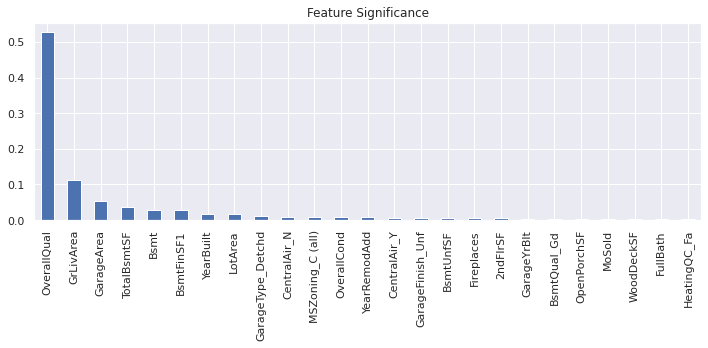

In [180]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [181]:
np.sum(pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending=False).to_numpy()[:50])

0.9593414602623125

In [182]:
import sklearn.feature_selection as fs

In [183]:
mir_result = fs.mutual_info_regression(x_train, y_train)

In [184]:
x_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.173605,0.322669,0.000000,0.064212,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.143490,0.222121,0.000000,0.185788,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.310009,0.299360,0.000000,0.209760,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.105403,0.361060,0.110583,0.252140,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [185]:
included_features = x_train.columns

In [186]:
included_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_Oth',
       'SaleCondition_Normal', 'SaleCondition_Abnorml',
       'SaleCondition_Partial', 'SaleCondition_Family', 'SaleCondition_Alloca',
       'SaleCondition_AdjLand'],
      dtype='object', length=261)

In [187]:
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
sorted_scores = pd.DataFrame(np.array(sorted_scores))
sorted_scores = sorted_scores.rename(columns={0:"Variable",1:"Significance"})
sorted_scores["Significance"] = sorted_scores["Significance"].astype(float)

In [188]:
sorted_scores = sorted_scores.head(60)

<Figure size 2880x720 with 0 Axes>

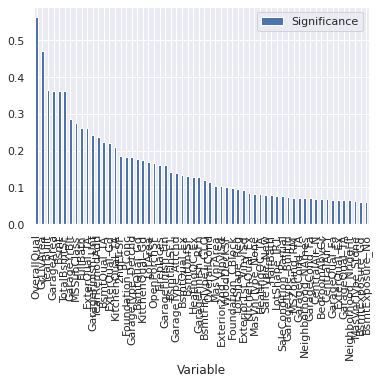

In [189]:
plt.figure(figsize=(40, 10))
ax = sorted_scores.plot.bar(x="Variable",y="Significance",rot=90)

### 2. Grid Search Tuning

In [190]:
# 1st round
rf = RandomForestRegressor()
params = {"max_depth":[5,10], 
          "n_estimators":[20,40,60,80],
          "max_features":[20,40,60],
          "max_leaf_nodes":[20,50,80],
          "min_samples_leaf":[1,5,10],
         }
rf_reg = GridSearchCV(rf, 
                      params, 
                      cv = 10, 
                      n_jobs = 4,
                      #refit=True,
                      scoring='neg_mean_squared_error')

rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_valid = best_estimator.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

RandomForestRegressor(max_depth=10, max_features=60, max_leaf_nodes=80,
                      n_estimators=60)
Root Mean Square Error train = 0.08410876886931941
Root Mean Square Error test = 0.13502106824307158


In [191]:
np.sqrt(mean_squared_error(Y_valid, y_pred_valid))

0.13502106824307158

In [192]:
print(rf_reg.best_estimator_)


RandomForestRegressor(max_depth=10, max_features=60, max_leaf_nodes=80,
                      n_estimators=60)


In [193]:
best_estimator=rf_reg.best_estimator_
best_estimator.fit(x_train, y_train)
y_pred_train = best_estimator.predict(X_train)
y_pred_valid = best_estimator.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

Root Mean Square Error train = 0.09209327996566756
Root Mean Square Error test = 0.09030971354331423


In [194]:
# 2nd round
rf = RandomForestRegressor()
params = {"max_depth":[8,9,10,11,12,13,14], 
          "n_estimators":[60,65,70,80,85,90],
          "max_features":[40],
          "max_leaf_nodes":[40,60,80,100],
          "min_samples_leaf":[1,5,10],
         }
rf_reg = GridSearchCV(rf, 
                      params, 
                      cv = 10, 
                      n_jobs = 4,
                      #refit=True,
                      scoring='neg_mean_squared_error')

rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_valid = best_estimator.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

RandomForestRegressor(max_depth=13, max_features=40, max_leaf_nodes=100,
                      n_estimators=60)
Root Mean Square Error train = 0.08061808255556553
Root Mean Square Error test = 0.13289661413046008


In [195]:
print(rf_reg.best_estimator_)


RandomForestRegressor(max_depth=13, max_features=40, max_leaf_nodes=100,
                      n_estimators=60)


In [196]:
best_estimator=rf_reg.best_estimator_
best_estimator.fit(x_train, y_train)
y_pred_train = best_estimator.predict(X_train)
y_pred_valid = best_estimator.predict(X_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

Root Mean Square Error train = 0.0871799003398509
Root Mean Square Error test = 0.08479119892797306


In [197]:
X_test = df_test_cat_filled.to_numpy()
X_test.shape

(1459, 261)

In [198]:
#X_test[:1]

In [199]:
y_test=best_estimator.predict(X_test)

In [200]:
final_y_test = np.expm1(y_test)#bc_inv(y_test,lam_price)

In [201]:
final_y_test

array([124963.880772  , 149131.35891048, 181451.27015604, ...,
       152509.54314403, 112774.23071102, 218523.9658194 ])

In [202]:
sample=pd.read_csv('https://raw.githubusercontent.com/szbela87/dm/main/hw1/sample_submission.csv')

In [203]:
submission = pd.DataFrame({"Id":sample["Id"],
                           "SalePrice":final_y_test})

In [204]:
submission

,Id,SalePrice
0,1461,124963.880772
1,1462,149131.358910
2,1463,181451.270156
3,1464,180296.795727
4,1465,195118.585317
...,...,...
1454,2915,89295.877074
1455,2916,93038.589395
1456,2917,152509.543144
1457,2918,112774.230711


In [205]:
submission.to_csv('submission_1st_comp_2nd_trying.csv',index=False)

#### Extra tuning

In [206]:
# 3rd round
rf = RandomForestRegressor()
params = {"max_depth":[8,9,10,11,12,13,14], 
          "n_estimators":[60,65,70,80,85,90],
          "max_features":[40],
          "max_leaf_nodes":[40,60,80,100],
          "min_samples_leaf":[1,5,10],
         }
rf_reg = GridSearchCV(rf, 
                      params, 
                      cv = 10, 
                      n_jobs = 8,
                      #refit=True,
                      scoring='neg_mean_squared_error')

rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_valid = best_estimator.predict(X_valid)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid))))

RandomForestRegressor(max_depth=11, max_features=40, max_leaf_nodes=100,
                      n_estimators=70)
Root Mean Square Error train = 0.07991894762968886
Root Mean Square Error test = 0.13458014508781338


In [207]:
y_pred_valid.shape, Y_valid.shape, type(y_pred_train)

((435,), (435,), numpy.ndarray)

In [208]:
Y_valid = np.array(Y_valid)

In [209]:
rf = RandomForestRegressor()
params = {"max_depth":[8,9,10,11,12,13,14], 
          "n_estimators":[60,65,70,80,85,90],
          "max_leaf_nodes":[40,60,80,100],
          "min_samples_leaf":[1,5,10],
         }
rf_reg = GridSearchCV(rf, 
                      params, 
                      cv = 10, 
                      n_jobs = 8,
                      refit=True,
                      scoring='neg_mean_squared_error')

rf_reg.fit(y_pred_valid.reshape(-1,1), Y_valid.reshape(-1,1))
y_pred_train_stacked = rf_reg.predict(y_pred_train.reshape(-1,1))
y_pred_valid_stacked = rf_reg.predict(y_pred_valid.reshape(-1,1))
y_pred_test_stacked = rf_reg.predict(y_pred_test.reshape(-1,1))

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train_stacked))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_pred_valid_stacked))))

Root Mean Square Error train = 0.09331133578392158
Root Mean Square Error test = 0.10514712959367944


In [210]:
final_y_test = np.expm1(y_pred_test_stacked)

In [211]:
final_y_test

array([129932.44783677, 172285.34227975, 185108.32468227, ...,
       166340.66521446, 109843.42644234, 225686.96124358])

In [212]:
sample=pd.read_csv('https://raw.githubusercontent.com/szbela87/dm/main/hw1/sample_submission.csv')

In [213]:
submission = pd.DataFrame({"Id":sample["Id"],
                           "SalePrice":final_y_test})

In [214]:
submission

,Id,SalePrice
0,1461,129932.447837
1,1462,172285.342280
2,1463,185108.324682
3,1464,175217.280295
4,1465,205174.955655
...,...,...
1454,2915,84202.472803
1455,2916,86193.530143
1456,2917,166340.665214
1457,2918,109843.426442


In [215]:
submission.to_csv('submission_1st_comp_3rd_trying.csv',index=False)

# Choosing the models for the 2nd competition

by using any method:

1. XGBoost
2. SVM


## 1. XGBoost

XGBoost doesn't need scaling similar to random forests, but we used [0,1] transformation earlier.
https://stats.stackexchange.com/questions/353462/what-are-the-implications-of-scaling-the-features-to-xgboost

In [216]:
# 1st xgb

import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': np.linspace(0,0.5,11), #11 instead of 3
          'max_depth': [1,2,3,5],
          'n_estimators': [40,60,80],
          'colsample_bytree': [0.1,0.5,0.8]}
         
xgbr_reg = GridSearchCV(xgbr, 
                        params, 
                        cv = 5, 
                        n_jobs = 1,
                        refit=True,
                        scoring='neg_mean_squared_error')
xgbr_reg.fit(X_train,Y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

model_xgb_1 = xgbr_reg.best_estimator_
y_train_pred_xgb_1 = model_xgb_1.predict(X_train)
y_val_pred_xgb_1 = model_xgb_1.predict(X_valid)

Best params:{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 80}


In [217]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_xgb_1))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_xgb_1)))) 

Root Mean Square Error train = 0.07152625285733367
Root Mean Square Error test = 0.1216402397261596


In [218]:
# 2nd xgb

xgbr2 = xgb.XGBRegressor()
params = { 'max_depth': [3, 5, 6, 10],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbr_reg2 = RandomizedSearchCV(xgbr2, 
                        params, 
                        cv = 10, 
                        n_jobs = 4,
                        n_iter = 25, # instead of 1
                        refit=True,
                        scoring='neg_mean_squared_error',
                        verbose=1)
xgbr_reg2.fit(X_train,Y_train)

print("Best params:{}".format(xgbr_reg2.best_params_))

model_xgb_2 = xgbr_reg2.best_estimator_
y_train_pred_xgb_2 = model_xgb_2.predict(X_train)
y_val_pred_xgb_2 = model_xgb_2.predict(X_valid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best params:{'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}


In [219]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_xgb_2))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_xgb_2)))) 

Root Mean Square Error train = 0.037054393050120066
Root Mean Square Error test = 0.11148126015394308


## 2. SVM

In [220]:
from sklearn.svm import SVR


In [221]:
# SVR - radial basis function kernel

model = SVR(kernel="rbf")
params = {'C' : [0.1,0.05,0.5,1.0,2.0,5.0,10.0],
          'gamma' : [0.5,2,1,0.1,0.01,0.001]
         }

model_svr_1 = GridSearchCV(model, 
                        params, 
                        cv = 5, 
                        refit=True,
                        scoring='neg_mean_squared_error',
                        verbose=1)
model_svr_1.fit(X_train,Y_train)

print("Best params:{}".format(model_svr_1.best_params_))

#model_svr = model_svr.best_estimator_
y_train_pred_svr_1 = model_svr_1.predict(X_train)
y_val_pred_svr_1 = model_svr_1.predict(X_valid)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best params:{'C': 2.0, 'gamma': 0.01}


In [222]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_svr_1))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_svr_1)))) 

Root Mean Square Error train = 0.09233537405798825
Root Mean Square Error test = 0.12211468743123823


In [223]:
# SVR - polynomial kernel

model = SVR(kernel="poly")
params = {'C' : [1.0,5.0,10.0,15.0,20.0],
          'gamma' : [0.5,2,1,0.1,0.01,0.001],
          'degree' : [2,3]
         }

model_svr_2 = GridSearchCV(model, 
                        params, 
                        cv = 5, 
                        refit=True,
                        scoring='neg_mean_squared_error',
                        verbose=1)
model_svr_2.fit(X_train,Y_train)

print("Best params:{}".format(model_svr_2.best_params_))

#model_svr = model_svr.best_estimator_
y_train_pred_svr_2 = model_svr_2.predict(X_train)
y_val_pred_svr_2 = model_svr_2.predict(X_valid)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params:{'C': 10.0, 'degree': 2, 'gamma': 0.01}


In [224]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_svr_2))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_svr_2)))) 

Root Mean Square Error train = 0.08091973432792227
Root Mean Square Error test = 0.12745511389453218


In [225]:
# SVR - linear kernel

model = SVR(kernel="linear")
params = {'C' : np.linspace(0,0.5,51),
         }

model_svr_3 = GridSearchCV(model, 
                        params, 
                        cv = 5, 
                        refit=True,
                        scoring='neg_mean_squared_error',
                        verbose=1)
model_svr_3.fit(X_train,Y_train)

print("Best params:{}".format(model_svr_3.best_params_))

#model_svr = model_svr.best_estimator_
y_train_pred_svr_3 = model_svr_3.predict(X_train)
y_val_pred_svr_3 = model_svr_3.predict(X_valid)

Fitting 5 folds for each of 51 candidates, totalling 255 fits
Best params:{'C': 0.08}


In [226]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_svr_3))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_svr_3)))) 

Root Mean Square Error train = 0.09909049245045144
Root Mean Square Error test = 0.11738538221504118


## Putting them together in a stacked model

We'll use our trained models:
* model_ridge
* model_xgb_1
* model_xgb_2
* model_svr_1
* model_svr_2
* model_svr_3

The training set of the stacked model will be the predicted values by the methods above on the **Validation set**, and we'll use Ridge Regression to avoid overfitting. After that we'll make our final predictions.

In [227]:
y_test_pred_ridge = model_ridge.predict(X_test)
y_test_pred_xgb_1 = model_xgb_1.predict(X_test)
y_test_pred_xgb_2 = model_xgb_2.predict(X_test)
y_test_pred_svr_1 = model_svr_1.predict(X_test)
y_test_pred_svr_2 = model_svr_2.predict(X_test)
y_test_pred_svr_3 = model_svr_3.predict(X_test)

In [228]:
y_stacked_train = np.vstack([y_train_pred_ridge,y_train_pred_xgb_1,y_train_pred_xgb_2,y_train_pred_svr_1,y_train_pred_svr_2,y_train_pred_svr_3]).T
y_stacked_valid = np.vstack([y_val_pred_ridge,y_val_pred_xgb_1,y_val_pred_xgb_2,y_val_pred_svr_1,y_val_pred_svr_2,y_val_pred_svr_3]).T
y_stacked_test = np.vstack([y_test_pred_ridge,y_test_pred_xgb_1,y_test_pred_xgb_2,y_test_pred_svr_1,y_test_pred_svr_2,y_test_pred_svr_3]).T

In [229]:
y_stacked_train.shape, y_stacked_valid.shape, y_stacked_test.shape

((1014, 6), (435, 6), (1459, 6))

In [230]:
Y_valid.shape

(435,)

In [231]:
# Just for testing
meta_model = LinearRegression()
meta_model.fit(y_stacked_valid,Y_valid)
y = meta_model.predict(y_stacked_train)
y_valid = meta_model.predict(y_stacked_valid)

In [232]:
print(np.sqrt(np.mean((y-Y_train)**2.0)))
print(np.sqrt(np.mean((y_valid-Y_valid)**2.0)))

0.06514241791192374
0.10555991169356067


**Important Note**

We'll use Ridge regression for the stacking model with hyperparameter tuning.

In [233]:
ridge_stacked=Ridge()
parameters= {'alpha':[x for x in np.linspace(0,5,1001)]}

model_ridge_stacked=GridSearchCV(ridge_stacked, param_grid=parameters,refit=True)
model_ridge_stacked.fit(y_stacked_valid,Y_valid)
print("The best value of Alpha is: ",model_ridge_stacked.best_params_)

The best value of Alpha is:  {'alpha': 0.05}


In [234]:
# Check
model_ridge_stacked = Ridge(alpha=0.175)
model_ridge_stacked.fit(y_stacked_valid,Y_valid)

y_train_pred_ridge_stacked = model_ridge_stacked.predict(y_stacked_train)
y_val_pred_ridge_stacked = model_ridge_stacked.predict(y_stacked_valid)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_ridge_stacked))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_ridge_stacked)))) 

Root Mean Square Error train = 0.06331721531151385
Root Mean Square Error test = 0.10600490032556285


In [235]:
# final prediction
y_final = model_ridge_stacked.predict(y_stacked_test)

In [236]:
y_final = np.expm1(y_final)

In [237]:
sample=pd.read_csv('https://raw.githubusercontent.com/szbela87/dm/main/hw1/sample_submission.csv')

In [238]:
submission = pd.DataFrame({"Id":sample["Id"],
                           "SalePrice":y_final})

In [239]:
submission

,Id,SalePrice
0,1461,124069.259327
1,1462,157983.079160
2,1463,191912.736478
3,1464,199325.666167
4,1465,182601.355095
...,...,...
1454,2915,86533.178112
1455,2916,85116.724356
1456,2917,161688.405736
1457,2918,119515.815651


In [240]:
submission.to_csv('submission_2nd_comp_2nd_trying.csv',index=False)

#### Extra tuning

In [241]:
# SVR instead of Ridge regression

model = SVR(kernel="poly")
params = {'C' : [0.1,0.5,1.0,5.0,10.0,20.0],
          'gamma' : [1,0.1,0.01,0.001],
          'degree' : [2,3]
         }

model_svr = GridSearchCV(model, 
                        params, 
                        cv = 10, 
                        refit=True,
                        scoring='neg_mean_squared_error',
                        verbose=1)
model_svr.fit(y_stacked_valid,Y_valid)

print("Best params:{}".format(model_svr.best_params_))

#model_svr = model_svr.best_estimator_
y_train_pred_svr_stacked = model_svr.predict(y_stacked_train)
y_val_pred_svr_stacked = model_svr.predict(y_stacked_valid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best params:{'C': 0.5, 'degree': 2, 'gamma': 0.1}


In [242]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_train_pred_svr_stacked))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_valid, y_val_pred_svr_stacked)))) 

Root Mean Square Error train = 0.06514007216247872
Root Mean Square Error test = 0.10549646400017064


In [243]:
# final prediction
y_final = model_svr.predict(y_stacked_test)

In [244]:
y_final = np.expm1(y_final)

In [245]:
sample=pd.read_csv('https://raw.githubusercontent.com/szbela87/dm/main/hw1/sample_submission.csv')

In [246]:
submission = pd.DataFrame({"Id":sample["Id"],
                           "SalePrice":y_final})

In [247]:
submission

,Id,SalePrice
0,1461,122667.718802
1,1462,157740.279898
2,1463,191070.416478
3,1464,199352.148209
4,1465,180584.852210
...,...,...
1454,2915,87547.606186
1455,2916,85779.302303
1456,2917,159444.476272
1457,2918,119321.418689


In [248]:
submission.to_csv('submission_2nd_comp_3rd_trying.csv',index=False)